# Yammer Case Study - SQL

## Investigating a Drop in User Engagement

### The problem

You show up to work Tuesday morning, September 2, 2014. The head of the Product team walks over to your desk and asks you what you think about the latest activity on the user engagement dashboards. You fire them up, and something immediately jumps out:

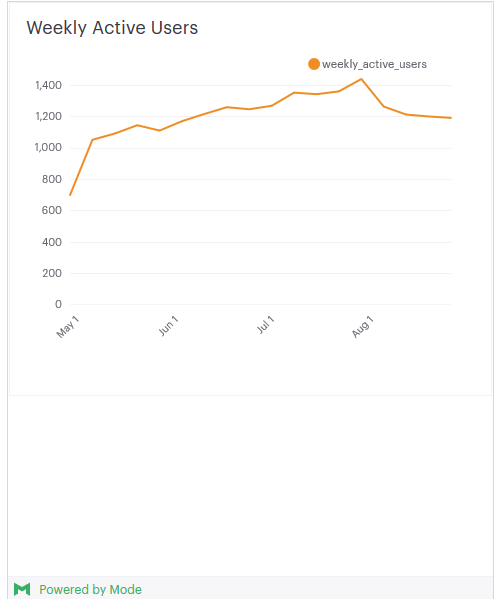

In [3]:
from IPython.display import Image
Image("capture3.png")

The above chart shows the number of engaged users each week. Yammer defines engagement as having made some type of server call by interacting with the product (shown in the data as events of type “engagement”). Any point in this chart can be interpreted as “the number of users who logged at least one engagement event during the week starting on that date.”

You are responsible for determining what caused the dip at the end of the chart shown above and, if appropriate, recommending solutions for the problem.

## What could have caused the dip in user engagement?

- A holiday caused people to miss work/not log in to the service
- A product outage reduced the number of people that were able to log in
- Tracking code used to produce the data is malfunctioning
- Changes to search engines that impact traffic to the site

## The Tables:

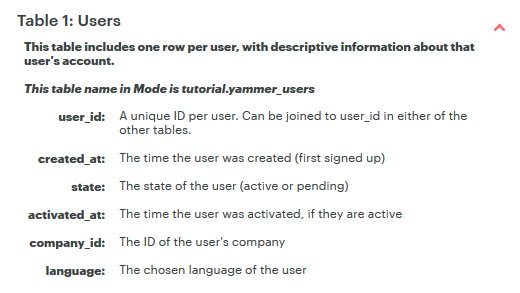

In [3]:
Image("capture4.png")

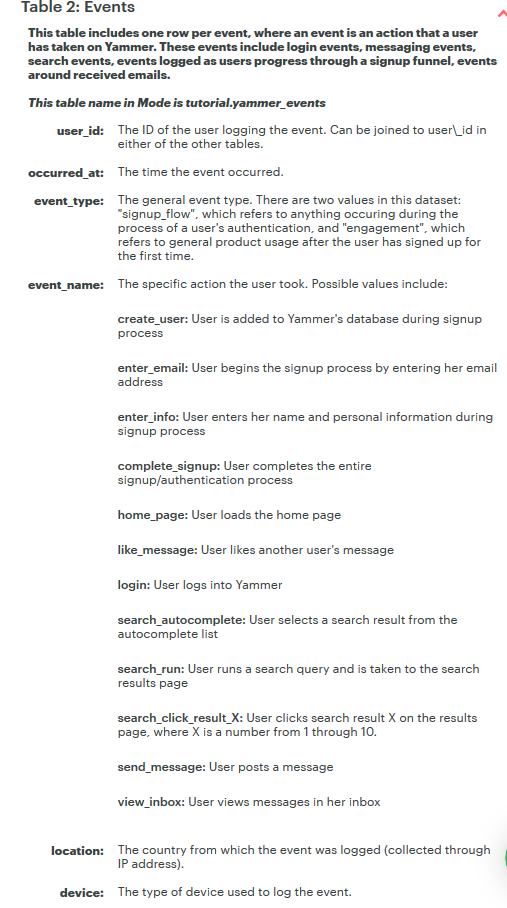

In [4]:
Image("capture5.png")

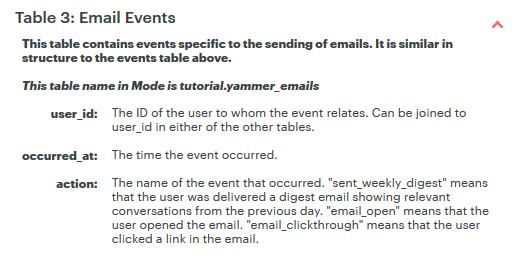

In [5]:
Image("capture6.png")

## Answer the following questions:

### 1. Do the answers to any of your original hypotheses lead you to further questions?
### 2. If so, what are they and how will you test them?
### 3. If they are questions that you can’t answer using data alone, how would you go about answering them (hypothetically, assuming you actually worked at this company)?
### 4. What seems like the most likely cause of the engagement dip?
### 5. What, if anything, should the company do in response?


In [ ]:
# Get a sense of what data is in each table
SELECT *
  FROM tutorial.yammer_users
  LIMIT 100

SELECT *
  FROM tutorial.yammer_events
  LIMIT 100

SELECT *
  FROM tutorial.yammer_emails
  LIMIT 100

In [ ]:
# 19066 users
SELECT COUNT(*)
  FROM tutorial.yammer_users 

In [ ]:
# Count of event type by date
SELECT event_type, 
       COUNT(event_type),
  LEFT(CAST(occurred_at AS VARCHAR), 10) as cleaned_date
  FROM tutorial.yammer_events 
  GROUP BY cleaned_date, event_type
  ORDER BY cleaned_date
  

In [ ]:
SELECT event_type,
       COUNT(*) AS count
  FROM tutorial.yammer_events
 GROUP BY event_type

In [ ]:
# This is the query used to make the graph at the top of the page
# Specifically measuring engagement and logins by user
SELECT DATE_TRUNC('week', e.occurred_at),
       COUNT(DISTINCT e.user_id) AS weekly_active_users
  FROM tutorial.yammer_events e
 WHERE e.event_type = 'engagement'
   AND e.event_name = 'login'
 GROUP BY 1
 ORDER BY 1

The e-mails table seems like it holds the answer. I will take a closer look.

In [ ]:
select DATE_TRUNC('week', occurred_at),
       COUNT(action) as count_of_action
FROM tutorial.yammer_emails 
WHERE action = 'sent_reengagement_email'
GROUP BY action, 1
ORDER BY 1

The below table is generated from the previous query.

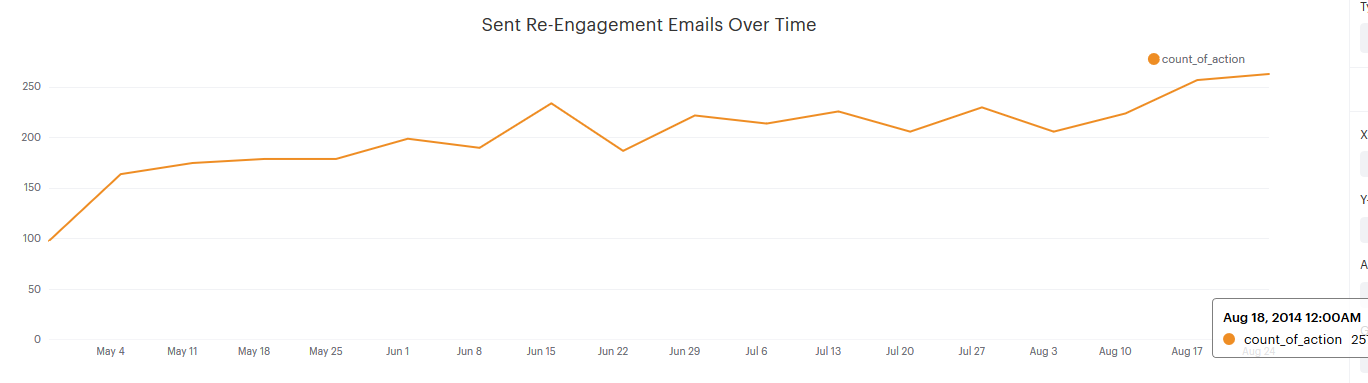

In [8]:
Image("capture8.png")

In [ ]:
select DISTINCT action
FROM tutorial.yammer_emails 

In [ ]:
select DATE_TRUNC('week', occurred_at),
       COUNT(action) as count_of_action
FROM tutorial.yammer_emails 
WHERE action = 'email_clickthrough'
GROUP BY action, 1
ORDER BY 1

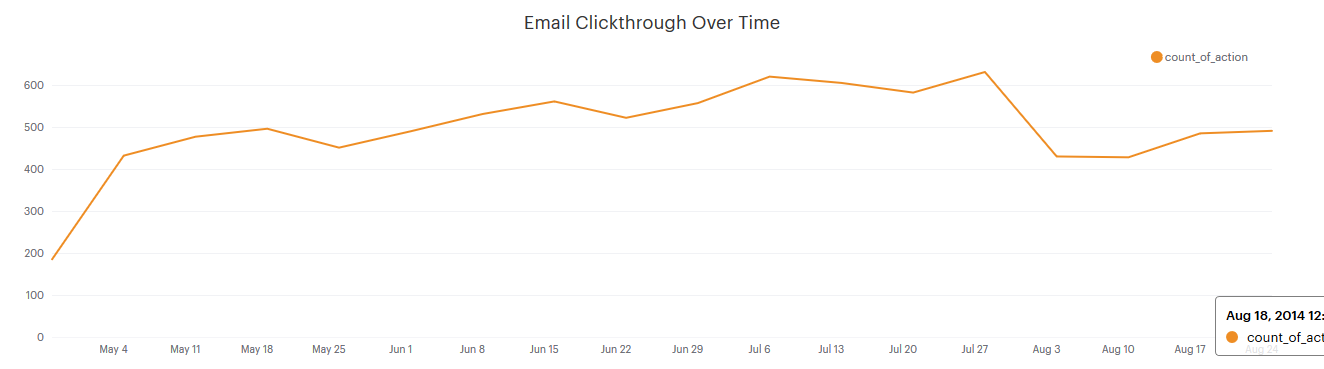

In [9]:
Image("capture9.png")

In [ ]:
select DATE_TRUNC('week', occurred_at),
       COUNT(action) as count_of_action
FROM tutorial.yammer_emails 
WHERE action = 'sent_weekly_digest'
GROUP BY action, 1
ORDER BY 1

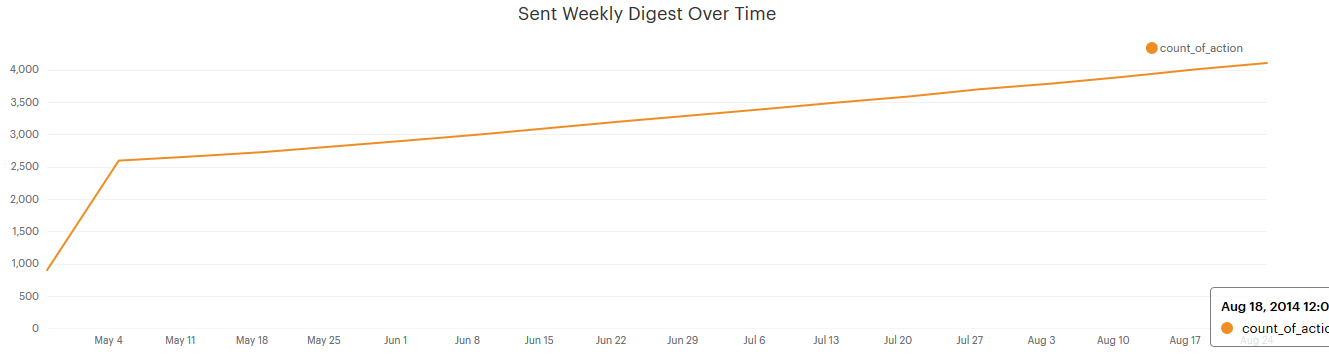

In [10]:
Image("capture10.png")

In [ ]:
select DATE_TRUNC('week', occurred_at),
       COUNT(action) as count_of_action
FROM tutorial.yammer_emails 
WHERE action = 'email_open'
GROUP BY action, 1
ORDER BY 1

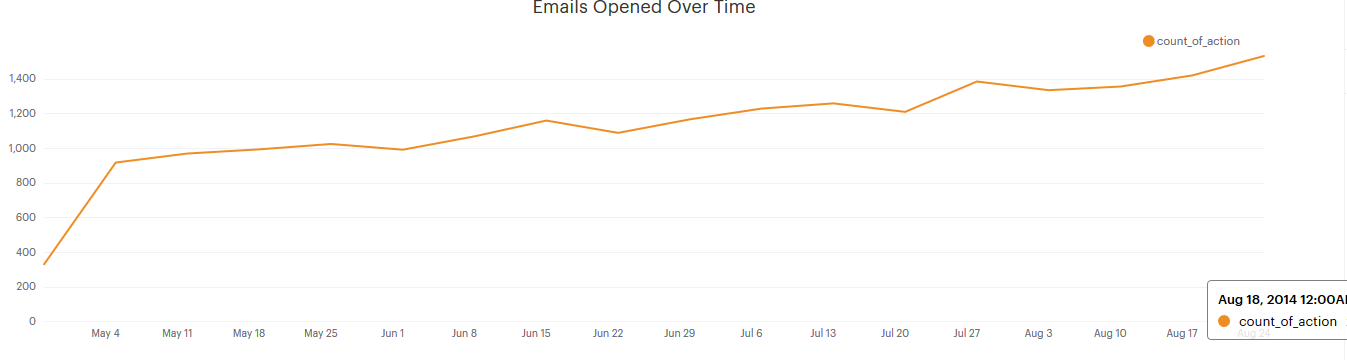

In [11]:
Image("capture11.png")

The events that stand-out to me from these line graphs are the sharp drop in email clickthrough between July and August, and the somewhat slighter drop in re-engagement e-mails sent. This is a possible cause of the drop in engagement observed initially, but I'll see what I can find from the events table as well.

In [ ]:
select week,
       SUM(CASE WHEN region = 'South America' THEN region_counts END) as south_america,
       SUM(CASE WHEN region = 'Middle East' THEN region_counts END) as middle_east,
       SUM(CASE WHEN region = 'Africa' THEN region_counts END) as africa,
       SUM(CASE WHEN region = 'Europe' THEN region_counts END) as europe,
       SUM(CASE WHEN region = 'North America' THEN region_counts END) as north_america,
       SUM(CASE WHEN region = 'Asia Pacific' THEN region_counts END) as asia_pacific
FROM (
select DATE_TRUNC('week', occurred_at) AS week,
     CASE WHEN location = 'Turkey' THEN 'Europe'
     WHEN location = 'Saudi Arabia' THEN 'Middle East'
     WHEN location = 'Netherlands' THEN 'Europe'
     WHEN location = 'Nigeria' THEN 'Africa'
     WHEN location = 'Australia' THEN 'Asia Pacific'
     WHEN location = 'Argentina' THEN 'South America'
     When location = 'Brazil' THEN 'South America'
     WHEN location = 'Mexico' Then 'North America'
     WHEN location = 'Taiwan' THEN 'Asia Pacific'
     WHeN location = 'Malaysia' THEN 'Asia Pacific'
     WHEN location = 'Spain' THEN 'Europe'
     WHEN location = 'Ireland' THEN 'Europe'
     WHEN location = 'Austria' THEN 'Europe'
     WHEN location = 'South Africa' THEN 'Africa'
     WHEN location = 'Poland' THEN 'Europe'
     WHEN location = 'Korea' THEN 'Asia Pacific'
     WHEN location = 'Sweden' THEN 'Europe'
     WHEN location = 'Italy' THEN 'Europe'
     WHEN location = 'India' THEN 'India'
     WHEN location = 'Philippines' THEN 'Asia Pacific'
     WHEN location = 'United Arab Emirates' THEN 'Middle East'
     WHEN location = 'Norway' THEN 'Europe'
     WHEN location = 'Germany' THEN 'Europe'
     WHEN location = 'Singapore' THEN 'Asia Pacific'
     WHEN location = 'France' THEN 'Europe'
     WHEN location = 'Iraq' THEN 'Middle East'
     WHEN location = 'Columbia' THEN 'South America'
     WHEN location = 'Japan' THEN 'Asia Pacific'
     WHEN location = 'Russia' THEN 'Europe'
     WHEN location = 'Denmark' THEN 'Europe'
     WHEN location = 'Egypt' THEN 'Africa'
     WHEN location = 'United States' THEN 'North America'
     WHEN location = 'Israel' THEN 'Middle East'
     WHEN location = 'Chile' THEN 'South America'
     WHEN location = 'Finland' THEN 'Europe'
     WHEN location = 'Thailand' THEN 'Asia Pacific'
     WHEN location = 'Venezuela' THEN 'South America'
     WHEN location = 'Iran' THEN 'Middle East'
     WHEN location = 'Hong Kong' THEN 'Asia Pacific'
     WHEN location = 'Portugal' THEN 'South America'
     WHEN location = 'Canada' THEN 'North America'
     WHEN location = 'United Kingdom' THEN 'Europe'
     WHEN location = 'Pakistan' THEN 'Middle East'
     WHEN location = 'Greece' THEN 'Europe'
     WHEN location = 'Switzerland' THEN 'Europe'
     WHEN location = 'Indonesia' THEN 'Europe'
     WHEN location = 'Belgium' THEN 'Europe' END AS region,
     COUNT(CASE WHEN location = 'Turkey' THEN 'Europe'
     WHEN location = 'Saudi Arabia' THEN 'Middle East'
     WHEN location = 'Netherlands' THEN 'Europe'
     WHEN location = 'Nigeria' THEN 'Africa'
     WHEN location = 'Australia' THEN 'Asia Pacific'
     WHEN location = 'Argentina' THEN 'South America'
     When location = 'Brazil' THEN 'South America'
     WHEN location = 'Mexico' Then 'North America'
     WHEN location = 'Taiwan' THEN 'Asia Pacific'
     WHeN location = 'Malaysia' THEN 'Asia Pacific'
     WHEN location = 'Spain' THEN 'Europe'
     WHEN location = 'Ireland' THEN 'Europe'
     WHEN location = 'Austria' THEN 'Europe'
     WHEN location = 'South Africa' THEN 'Africa'
     WHEN location = 'Poland' THEN 'Europe'
     WHEN location = 'Korea' THEN 'Asia Pacific'
     WHEN location = 'Sweden' THEN 'Europe'
     WHEN location = 'Italy' THEN 'Europe'
     WHEN location = 'India' THEN 'India'
     WHEN location = 'Philippines' THEN 'Asia Pacific'
     WHEN location = 'United Arab Emirates' THEN 'Middle East'
     WHEN location = 'Norway' THEN 'Europe'
     WHEN location = 'Germany' THEN 'Europe'
     WHEN location = 'Singapore' THEN 'Asia Pacific'
     WHEN location = 'France' THEN 'Europe'
     WHEN location = 'Iraq' THEN 'Middle East'
     WHEN location = 'Columbia' THEN 'South America'
     WHEN location = 'Japan' THEN 'Asia Pacific'
     WHEN location = 'Russia' THEN 'Europe'
     WHEN location = 'Denmark' THEN 'Europe'
     WHEN location = 'Egypt' THEN 'Africa'
     WHEN location = 'United States' THEN 'North America'
     WHEN location = 'Israel' THEN 'Middle East'
     WHEN location = 'Chile' THEN 'South America'
     WHEN location = 'Finland' THEN 'Europe'
     WHEN location = 'Thailand' THEN 'Asia Pacific'
     WHEN location = 'Venezuela' THEN 'South America'
     WHEN location = 'Iran' THEN 'Middle East'
     WHEN location = 'Hong Kong' THEN 'Asia Pacific'
     WHEN location = 'Portugal' THEN 'South America'
     WHEN location = 'Canada' THEN 'North America'
     WHEN location = 'United Kingdom' THEN 'Europe'
     WHEN location = 'Pakistan' THEN 'Middle East'
     WHEN location = 'Greece' THEN 'Europe'
     WHEN location = 'Switzerland' THEN 'Europe'
     WHEN location = 'Indonesia' THEN 'Europe'
     WHEN location = 'Belgium' THEN 'Europe' END) AS region_counts
from tutorial.yammer_events
group by region, 1
order by 1
) sub
group by 1
order by 1

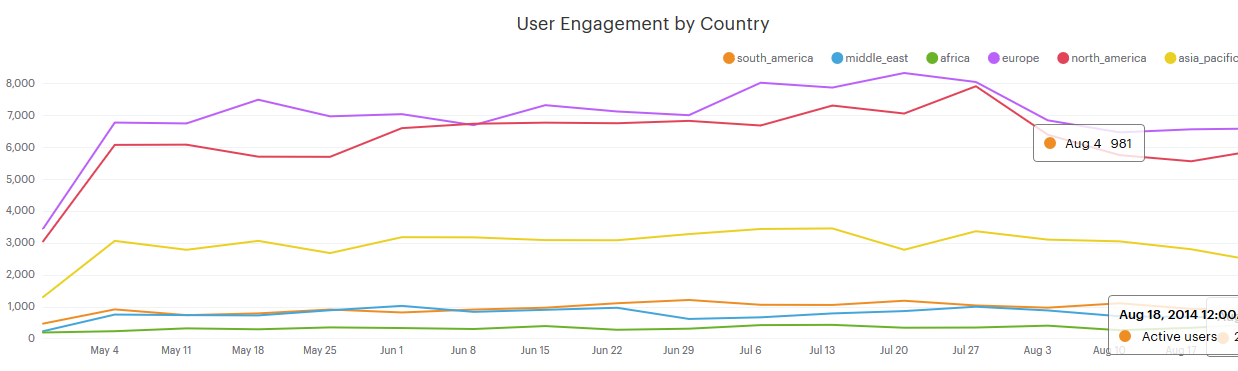

In [12]:
Image("capture12.png")

explanation of mobile/pc chart


In [ ]:
SELECT week,
       SUM(CASE WHEN device_type = 'mobile' THEN device_type_counts END) as mobile,
       SUM(CASE WHEN device_type = 'pc' THEN device_type_counts END) as pc
FROM (
select DATE_TRUNC('week', occurred_at) AS week,
      CASE WHEN device = 'kindle fire' THEN 'mobile'
        WHEN device = 'iphone 5s' THEN 'mobile'
        WHEN device = 'samsung galaxy note' then 'mobile'
        WHEN device = 'ipad mini' then 'mobile'
        WHEN device = 'nokia lumia 635' then 'mobile'
        WHEN device = 'nexus 7' then 'mobile'
        WHEN device = 'nexus 10' then 'mobile'
        WHEN device = 'samsung galaxy tablet' then 'mobile'
        WHEN device = 'amazon fire phone' then 'mobile'
        WHEN device = 'nexus 5' then 'mobile'
        WHEN device = 'iphone 4s' then 'mobile'
        WHEN device = 'windows surface' then 'mobile'
        WHEN device = 'htc one' then 'mobile'
        WHEN device = 'iphone 5' then 'mobile'
        WHEN device = 'ipad air' then 'mobile'
        WHEN device = 'samsung galaxy s4' then 'mobile'
        WHEN device = 'asus chromebook' then 'pc'
        WHEN device = 'hp pavilion desktop' then 'pc'
        WHEN device = 'macbook air' then 'pc'
        WHEN device = 'dell inspiron desktop' then 'pc'
        WHEN device = 'dell inspiron notebook' then 'pc'
        WHEN device = 'mac mini' then 'pc'
        WHEN device = 'macbook pro' THEN 'pc'
        WHEN device = 'acer aspire notebook' THEN 'pc'
        WHEN device = 'acer aspire desktop' THEN 'pc'
        WHEN device = 'lenovo thinkpad' THEN 'pc' END AS device_type,
        COUNT(CASE WHEN device = 'kindle fire' THEN 'mobile'
        WHEN device = 'iphone 5s' THEN 'mobile'
        WHEN device = 'samsung galaxy note' then 'mobile'
        WHEN device = 'ipad mini' then 'mobile'
        WHEN device = 'nokia lumia 635' then 'mobile'
        WHEN device = 'nexus 7' then 'mobile'
        WHEN device = 'nexus 10' then 'mobile'
        WHEN device = 'samsung galaxy tablet' then 'mobile'
        WHEN device = 'amazon fire phone' then 'mobile'
        WHEN device = 'nexus 5' then 'mobile'
        WHEN device = 'iphone 4s' then 'mobile'
        WHEN device = 'windows surface' then 'mobile'
        WHEN device = 'htc one' then 'mobile'
        WHEN device = 'iphone 5' then 'mobile'
        WHEN device = 'ipad air' then 'mobile'
        WHEN device = 'samsung galaxy s4' then 'mobile'
        WHEN device = 'asus chromebook' then 'pc'
        WHEN device = 'hp pavilion desktop' then 'pc'
        WHEN device = 'macbook air' then 'pc'
        WHEN device = 'dell inspiron desktop' then 'pc'
        WHEN device = 'dell inspiron notebook' then 'pc'
        WHEN device = 'mac mini' then 'pc'
        WHEN device = 'macbook pro' THEN 'pc'
        WHEN device = 'acer aspire notebook' THEN 'pc'
        WHEN device = 'acer aspire desktop' THEN 'pc'
        WHEN device = 'lenovo thinkpad' THEN 'pc' END) AS device_type_counts
  FROM tutorial.yammer_events
  group by device_type, 1
  order by 1
  ) sub
  group by 1
  order by 1

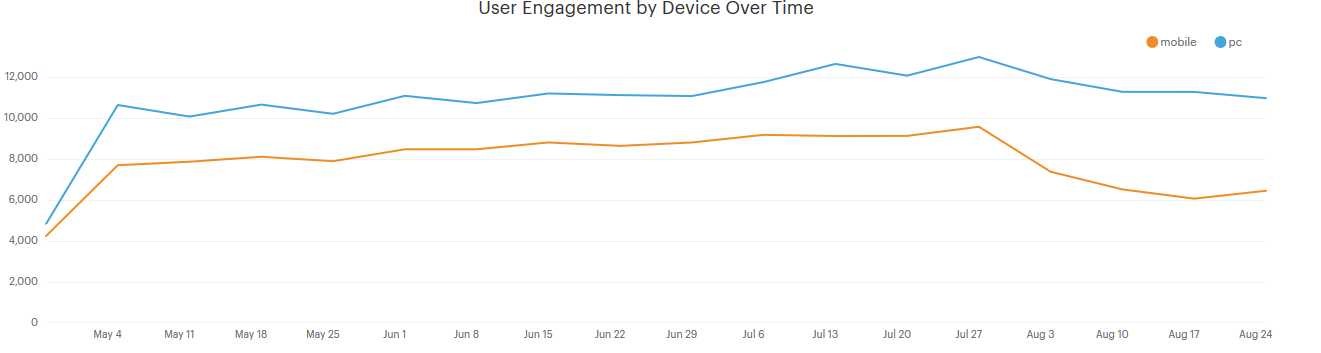

In [13]:
Image("capture1a.png")